# 얼굴인식
1차: 2021.07.14


In [1]:
# 주석 (코드 돌아가지 않는 부분)

import numpy as np  #코드

# 할 일 정리
0. 필요한 라이브러리를 가져온다 (import)   
tensorflow, keras, 등등...   
imgshow, numpy, ....

1. colab 에 데이터 불러오기   

2. 모델을 만든다 (CNN 코드를 참고해서)

3. face-training-set 으로 모델을 학습시킨다. (train)
문제랑 정답을 같이 줘서 모델을 트레ㅇ닝

4. 모델이 내놓은 정답이랑, 실제 정답 비교

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib  #시각화ㅡ 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt  #plt.img_show()
import os
import cv2
from os.path import isfile, join
import glob
import gzip
from PIL import Image
from scipy import misc

In [6]:
# 딥러닝에 필요한 라이브러리들 import

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

In [7]:

# CNN
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.utils.np_utils import to_categorical

from keras import layers, regularizers, optimizers, callbacks
from collections import defaultdict
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization

from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

from keras import layers
from keras import models
from keras.utils import np_utils  # to_categorical

<Figure size 432x288 with 0 Axes>

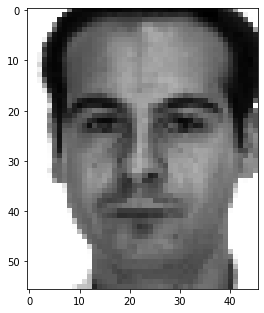

In [8]:
### 첫번째 데이터 출력해보기
img1 = matplotlib.image.imread(join('/content/drive/MyDrive/face-training-set/0001_0001.BMP'))
plt.figure()
plt.figure(figsize=(24,25))
plt.subplot(1,5,1, facecolor='w')
plt.imshow(img1, cmap='gray')

# 꼭 알아야할 개념
### 1. 하이퍼 파라미터 (hyper-parameter)
epochs=40, batch_size=16, learning-rate=0.0001, ...   
활성화 함수(activation func): relu, softmax 등등의 다양한 활성화 함수 존재

### 2. CNN 모델의 layer
-> 성능에 많은 영향

### 3. 트레이닝셋과 테스트셋
트레이닝셋은? 질문과 정답을 같이 준다   
테스트셋은? 질문만 주고, 정답과 비교 -> 성능 측정

### 4. 성능 개선

# 1. 데이터셋 불러오기
트레이닝, 테스트셋 불러오기

In [9]:

# 학습 결과 분석을 위한 그래프 구현

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
  # summarize history for accuracy
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  if title is not None:
    plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Verification'], loc=0)   # 두 선의 이름(Train, Test) 표시

def plot_loss(history, title=None):
  # summarize history for loss
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['loss'])             # 학습 데이터로 구한 손실값
  plt.plot(history['val_loss'])         # 검증 데이터로 구한 손실값
  if title is not None:
    plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Verification'], loc=0)

In [10]:
def create_Trainset(folder):
   
    img_data_array=[]
    class_name=[]
    
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        image = load_img(image_path, 'rb')
        image = img_to_array(image)
        
        if image.shape[2] == 3:
            image = image.mean(2)

        img_data_array.append(image)
        name_index = file.split("_")
        name_index = int(name_index[0])
        class_name.append(name_index)
        
    return np.array(img_data_array), np.array(class_name)


def create_Testset(folder):
   
    img_data_array=[]
    class_name=[]
    
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        image = load_img(image_path, 'rb')
        image = img_to_array(image)
        
        if image.shape[2] == 3:
            image = image.mean(2)

        img_data_array.append(image)
        name_index = file.split(".")
        name_index = int(name_index[0])
        class_name.append(name_index)
        
    return np.array(img_data_array), np.array(class_name)

# 정규화
def normalization(image):  
    image = image / image.max()
    return image



train_PATH = '/content/drive/MyDrive/face-training-set'
x_train, y_train = create_Trainset(train_PATH) #불러오기
x_train = normalization(x_train) # 정규화 진행

test_PATH = '/content/drive/MyDrive/face-test-set'
x_test, _ = create_Testset(test_PATH)
x_test = normalization(x_test)

### 첫번째 데이터 출력해보기
img1 = matplotlib.image.imread(join('/content/drive/MyDrive/face-training-set/0001_0001.BMP'))
plt.figure()
plt.figure(figsize=(24,25))
plt.subplot(1,5,1, facecolor='w')
plt.imshow(img1, cmap='gray')

print('Train images :',x_train.shape)
print('Train labels : ', y_train.shape)
print('Test images : ', x_test.shape)


KeyboardInterrupt: ignored

# 2. CNN 모델 만들기
layer 많이 안 쌓고 기본적인 모델로 일단 해보았다.

# 히히
### 1. 첫번째 모델 만듦
드라이브의 케라스 불러와서 실행했당
레이어는 조금 쌓아서 간단하당

In [2]:
import keras

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(56, 46)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(351, activation='softmax')
])

# loss 함수로 sparse_categorical_crossentropy 사용
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()   # 모델 확인하기


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2576)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               659712    
_________________________________________________________________
dense_1 (Dense)              (None, 351)               90207     
Total params: 749,919
Trainable params: 749,919
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=30)